# Lightcurves are downloaded from the Swift GRB catalog

https://swift.gsfc.nasa.gov/results/batgrbcat/

Authors: Vikas Chand, Partha S. Pal, Dimple

In [1]:
from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt
from astropy.stats import bayesian_blocks

# Create Bayesian Blocks

In [2]:
# Create Bayesian blocks

def BAT_bblocks(a, b, c):
    
    index=np.argsort(a)
    
    # Bayesian blocks
    a1,b1 ,c1  = a[index], b[index], c[index]
    c1[(c1 == 0)] = np.min(c1[(c1 != 0)]) # replace sigma = 0 with minimum error observed 
    
    edges = bayesian_blocks(a1, b1, sigma=(c1)/2, fitness='measures', p0=0.01)
    x = (edges[1:]+edges[:-1])/2
    
    # Plot Bayesian blocks
    
    aflx = []
    for i1 in range(0, len(x)):
        xx = []
        for ii in range(0, len(a1)):
            if (a1[ii] >= edges[i1]) & (a1[ii] <= edges[i1+1]):
                xx.append(b1[ii])
        aflx.append(np.mean(xx))
        
    return np.array(edges), np.array(aflx)


# Plot Lightcurves

In [5]:
def plot_LC(grbname, binsize, xl, xu):
    binsize = str(binsize)+'ms'
    GRB1 = ascii.read(grbname+"_"+binsize+"_lc_ascii.dat.txt")
    times_GRB1, LC1_GRB1, LC1_GRB1_err, LC2_GRB1, LC2_GRB1_err, LC3_GRB1, LC3_GRB1_err, LC4_GRB1, LC4_GRB1_err = np.array(GRB1['col1']), np.array(GRB1['col2']), np.array(GRB1['col3']), np.array(GRB1['col4']), np.array(GRB1['col5']), np.array(GRB1['col6']), np.array(GRB1['col7']), np.array(GRB1['col8']), np.array(GRB1['col9'])
    
    max_counts = max(np.max(LC1_GRB1), np.max(LC2_GRB1), np.max(LC3_GRB1), np.max(LC4_GRB1)) + 0.05
    #print(max_counts)
    
    edges1, aflx1 = BAT_bblocks(times_GRB1, LC1_GRB1, LC1_GRB1_err)
    edges2, aflx2 = BAT_bblocks(times_GRB1, LC2_GRB1, LC2_GRB1_err)
    edges3, aflx3 = BAT_bblocks(times_GRB1, LC3_GRB1, LC3_GRB1_err)
    edges4, aflx4 = BAT_bblocks(times_GRB1, LC4_GRB1, LC4_GRB1_err)
    
    
    
    
    plt.figure()
    ax1 = plt.subplot(1, 1, 1)
    ax1.errorbar(times_GRB1, 4*max_counts+LC4_GRB1, yerr=4*LC4_GRB1_err, ds='steps-post', ls='-', color='b', alpha=0.5, zorder=1)
    ax1.plot(edges4, 4*max_counts+np.append(aflx4, aflx4[-1]), ds='steps-post',color='k',linewidth=2, zorder=2)
    
    
    ax1.errorbar(times_GRB1, 3*max_counts+LC3_GRB1, yerr=3*LC3_GRB1_err, ds='steps-post', ls='-', color='g', alpha=0.5, zorder=1)
    ax1.plot(edges3, 3*max_counts+np.append(aflx3, aflx3[-1]), ds='steps-post',color='k',linewidth=2, zorder=2)
    
    
    ax1.errorbar(times_GRB1, 2*max_counts+LC2_GRB1, yerr=2*LC2_GRB1_err, ds='steps-post', ls='-', color='y', alpha=0.5, zorder=1)
    ax1.plot(edges2, 2*max_counts+np.append(aflx2, aflx2[-1]), ds='steps-post',color='k',linewidth=2, zorder=2)
    
    
    ax1.errorbar(times_GRB1, max_counts+LC1_GRB1, yerr=LC1_GRB1_err, ds='steps-post', ls='-', color='r', alpha=0.5, zorder=1)
    ax1.plot(edges1, max_counts+np.append(aflx1, aflx1[-1]), ds='steps-post',color='k',linewidth=2, zorder=2)
    
    ax1.set_title('GRB '+GRB_name[3:])
    ax1.set_xlabel('Time since BAT Triggertime')
    ax1.set_ylabel(r'$counts~s^{-1}~det^{-1}$ (scaled)')
    ax1.set_xlim(xl, xu)
    #plt.legend(loc='best')
    plt.tight_layout()
    plt.savefig(grbname+'.pdf', format='pdf')
    return times_GRB1, LC1_GRB1, LC1_GRB1_err, LC2_GRB1, LC2_GRB1_err, LC3_GRB1, LC3_GRB1_err, LC4_GRB1, LC4_GRB1_err


(array([-239.048, -238.984, -238.92 , ...,  962.744,  962.808,  962.872]),
 array([ 0.012538, -0.036269, -0.050858, ...,  0.02172 , -0.02337 ,
        -0.00779 ]),
 array([0.030298, 0.034002, 0.034598, ..., 0.026098, 0.029171, 0.024842]),
 array([-0.071792,  0.001342, -0.084671, ..., -0.008698,  0.001819,
        -0.003207]),
 array([0.030314, 0.040546, 0.04157 , ..., 0.02612 , 0.023903, 0.025492]),
 array([-0.066674, -0.002637, -0.044492, ...,  0.009755, -0.003813,
         0.021917]),
 array([0.027766, 0.032474, 0.033002, ..., 0.022457, 0.023734, 0.024484]),
 array([ 0.013389, -0.040508,  0.011501, ...,  0.024683, -0.009308,
        -0.011963]),
 array([0.032609, 0.02913 , 0.032297, ..., 0.019139, 0.021193, 0.017251]))

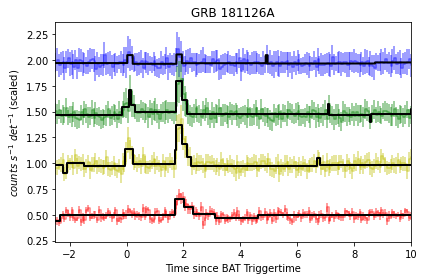

In [6]:
GRB_name = 'GRB181126A'
plot_LC(GRB_name, 64, -2.5, 10)
